In [51]:
# Import necessary libraries
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.tsa.api 

# Load the falls data
falls = pd.read_csv(r"C:\Users\debor\OneDrive\Desktop\fallsdata.csv")
# Display the first 5 rows of the DataFrame
falls.head(5)

,Patient ID,Date Of Fall,Time
0,JC,15/04/2020,14:15
1,EH,20/04/2020,15:40
2,JC,11/12/2020,03:50
3,MT,11/12/2020,22:10
4,LP,25/03/2021,22:10


In [52]:
import pandas as pd

# Drop the 'Patient ID' column
falls = falls.drop(columns=['Patient ID'])

# Display only the 'date_of_fall' and 'time_of_fall' columns
falls = falls[['Date Of Fall', 'Time']]



# Display the DataFrame
print(falls)

    Date Of Fall   Time
0     15/04/2020  14:15
1     20/04/2020  15:40
2     11/12/2020  03:50
3     11/12/2020  22:10
4     25/03/2021  22:10
..           ...    ...
181   28/07/2024  21:39
182   31/07/2024  00:05
183   20/08/2024  00:08
184   20/08/2024  00:08
185   26/08/2024  04:30

[186 rows x 2 columns]


In [53]:
#convert the 'Date Of Fall' to datetime
falls['Date Of Fall'] = pd.to_datetime(falls['Date Of Fall'], dayfirst=True)
print(falls)

    Date Of Fall   Time
0     2020-04-15  14:15
1     2020-04-20  15:40
2     2020-12-11  03:50
3     2020-12-11  22:10
4     2021-03-25  22:10
..           ...    ...
181   2024-07-28  21:39
182   2024-07-31  00:05
183   2024-08-20  00:08
184   2024-08-20  00:08
185   2024-08-26  04:30

[186 rows x 2 columns]


In [54]:
# Set 'Date Of Fall' as the index of the DataFrame
falls.set_index('Date Of Fall', inplace=True)

# Display the first few rows to verify the change
print(falls.head())


               Time
Date Of Fall       
2020-04-15    14:15
2020-04-20    15:40
2020-12-11    03:50
2020-12-11    22:10
2021-03-25    22:10


In [55]:
#Dsiplay first few rows to verify
falls.head()

,Time
Date Of Fall,
2020-04-15,14:15
2020-04-20,15:40
2020-12-11,03:50
2020-12-11,22:10
2021-03-25,22:10


In [56]:
import pandas as pd
# Resample the data by month and count the number of falls per Month
falls = falls.resample('ME').count()

# Rename column to 'Number of Falls'
falls.columns = ['Number of Falls']

# Display the DataFrame
print(falls.head())


              Number of Falls
Date Of Fall                 
2020-04-30                  2
2020-05-31                  0
2020-06-30                  0
2020-07-31                  0
2020-08-31                  0


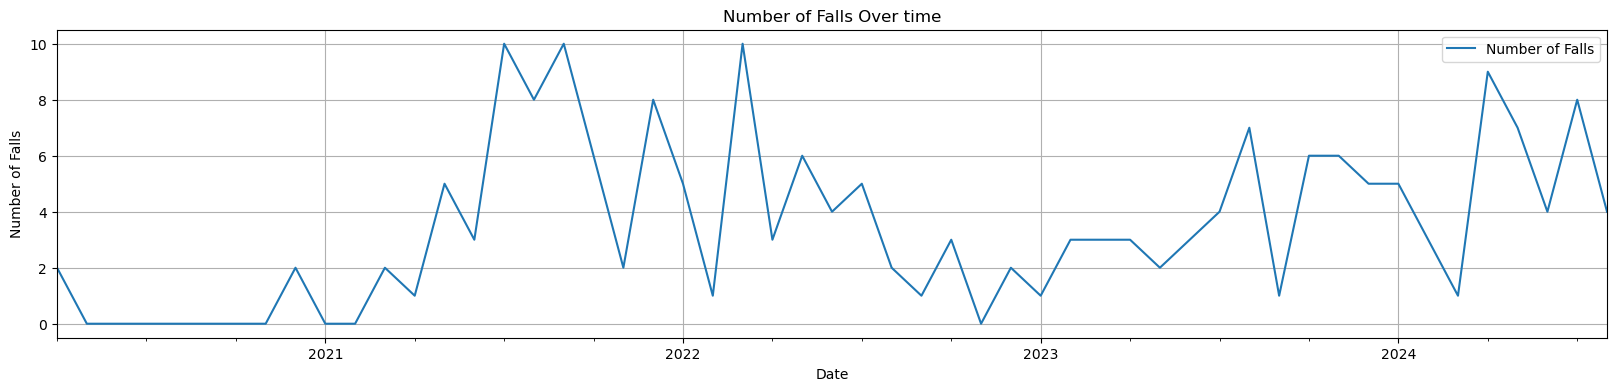

P-value:0.09119938478706391


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss


# Check the stationarity of the Data using ADF Test
# Augmented Dickey-Fuller (ADF) Test Function

falls.plot(figsize=(20,4))
plt.title('Number of Falls Over time')
plt.xlabel('Date')
plt.ylabel('Number of Falls')
plt.grid()
plt.show()

#Perform the ADF Test
adf_test = adfuller(falls ['Number of Falls'])
print('P-value:{}'.format(adf_test[1]))




<Axes: xlabel='Date Of Fall'>

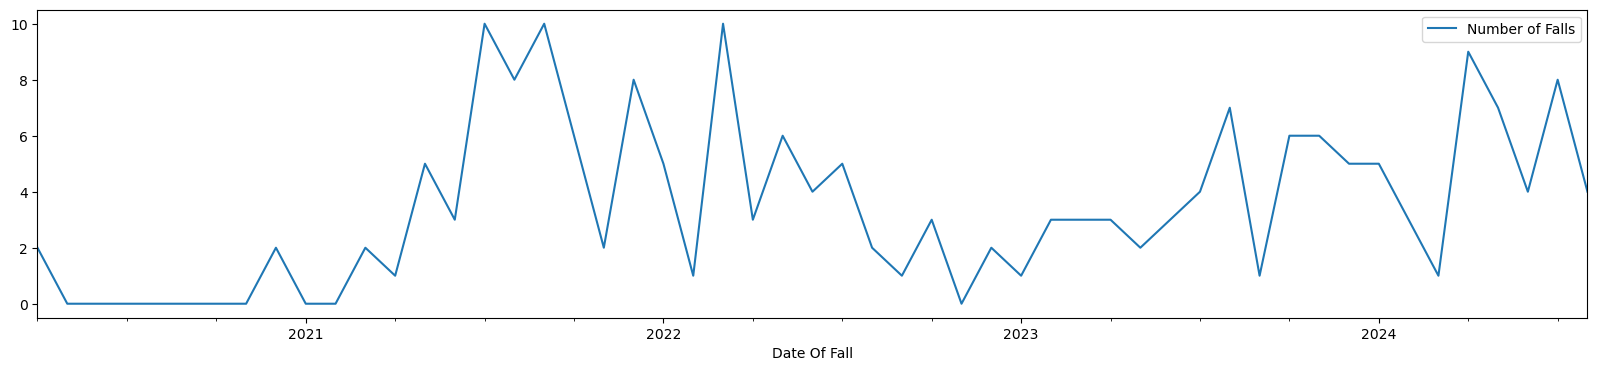

In [59]:
falls.plot(figsize=(20,4))
#Original time series shwoing fall trends and patterns from 2020 to 2024

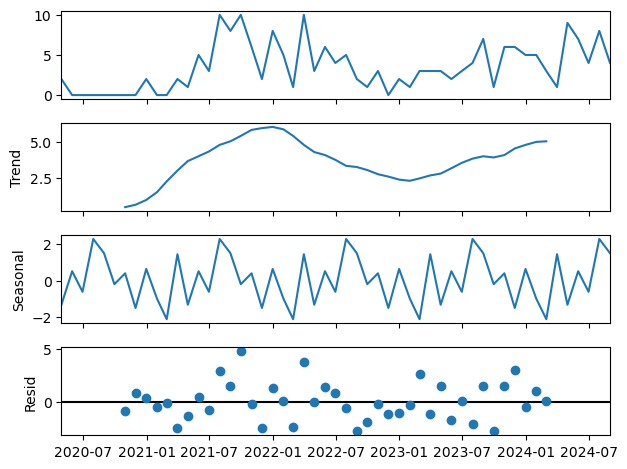

In [60]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the time series using an additive model with yearly seasonality
decomposition = seasonal_decompose(falls, model='additive', period=12)

# Plot the decomposition components
fig = decomposition.plot()
plt.show()

In [61]:
from sklearn.model_selection import train_test_split
import pandas as pd
# Split the data into training and test sets

X_train, X_test = train_test_split(falls[['Number of Falls']], test_size=0.2, shuffle=False)


print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (42, 1)
Test set shape: (11, 1)


In [62]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Train and Fit and build the Holt-Winters Exponential Smoothing model
model = ExponentialSmoothing(falls, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


                       ExponentialSmoothing Model Results                       
Dep. Variable:          Number of Falls   No. Observations:                   53
Model:             ExponentialSmoothing   SSE                            276.908
Optimized:                         True   AIC                            119.630
Trend:                         Additive   BIC                            151.155
Seasonal:                      Additive   AICC                           139.748
Seasonal Periods:                    12   Date:                 Mon, 17 Feb 2025
Box-Cox:                          False   Time:                         20:48:50
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3550241                alpha                 True
smoothing_trend          

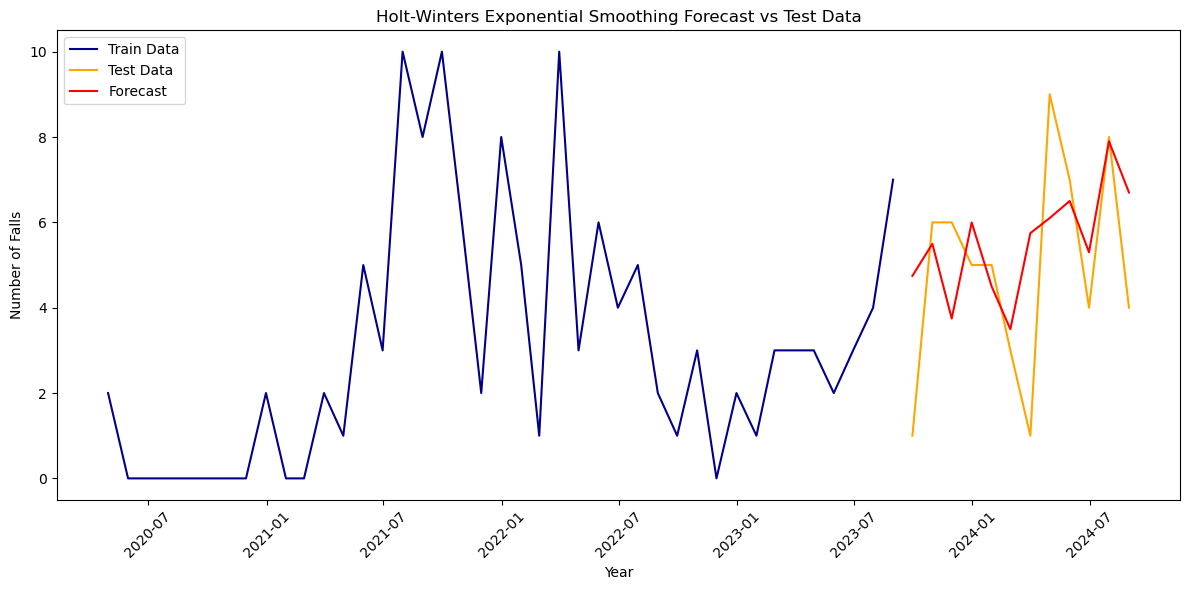

Root Mean Squared Error (RMSE): 2.26


In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error



# Now I Fit and build the Holt-Winters Exponential Smoothing model
model = ExponentialSmoothing(falls, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Now I will Generate forecast for the test set
forecast = model_fit.forecast(steps=len(test))

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train Data', color='darkblue')
plt.plot(test.index, test, label='Test Data', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('Holt-Winters Exponential Smoothing Forecast vs Test Data')
plt.xlabel('Year')
plt.ylabel('Number of Falls')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout() 
plt.show()

# Evaluate model performance
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


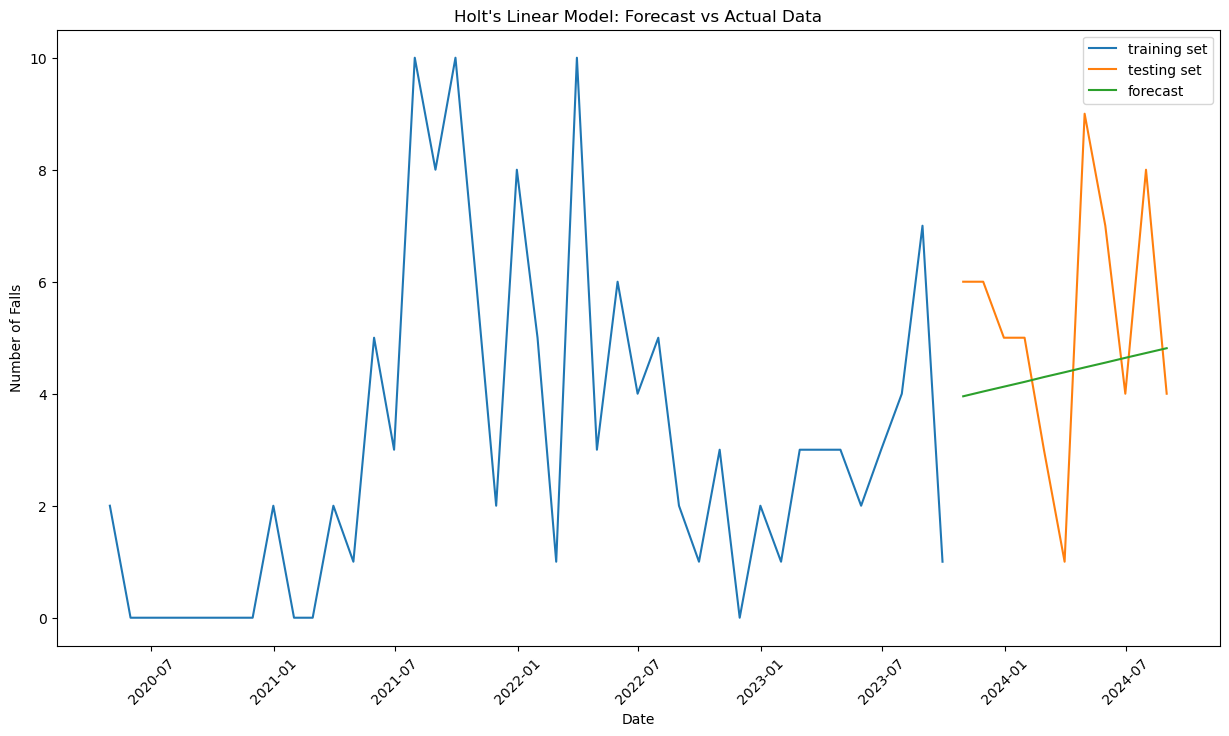

RMSE: 2.3516812220683816


In [46]:
# import the function
from statsmodels.tsa.api import Holt

# Split the data into train (80%) and test (20%) using train_test_split
X_train, X_test = train_test_split(falls[['Number of Falls']], test_size=0.2, shuffle=False)



# Fit and build the model 
holt = Holt(X_train['Number of Falls'], exponential = False).fit()

# add the forecast to the test data
X_test['holt_linear'] = holt.forecast(len(X_test))

# visualize
fig, ax = plt.subplots(figsize = (15, 8))
ax.plot(X_train, label = 'training set')
ax.plot(X_test.index, X_test['Number of Falls'], label = 'testing set')
ax.plot(X_test.index, X_test['holt_linear'], label = 'forecast')
ax.set_title("Holt's Linear Model: Forecast vs Actual Data")
ax.set_xlabel('Date')
ax.set_ylabel('Number of Falls')
ax.xaxis.set_tick_params(rotation = 45)
plt.legend()
plt.show()
# calculate the RMSE
rmse = np.sqrt(mean_squared_error(X_test['Number of Falls'], X_test['holt_linear']))
print(f'RMSE: {rmse}')

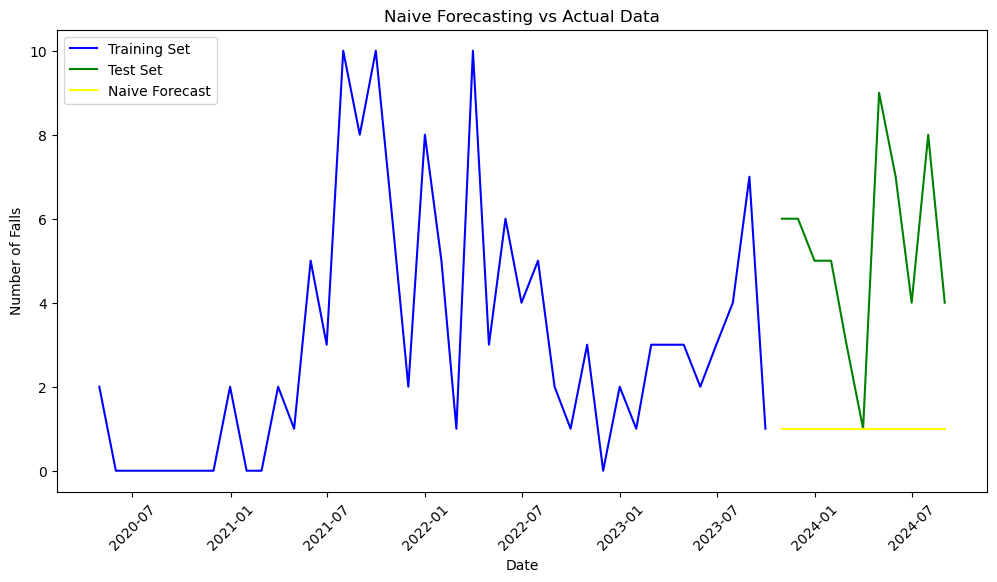

RMSE: 4.795831523312719


In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)

X_train, X_test = train_test_split(falls[['Number of Falls']], test_size = 0.2, shuffle = False)


# make a naive forecast

# calculate new naive forecast based on last observed value in the train set

naive_forecast = X_train.iloc[-1, 0]

# Add the naive forecast as a column in the testing set
X_test['naive_forecast'] = naive_forecast


# Visualize the data
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(X_train.index, X_train['Number of Falls'], label='Training Set', color='blue')
ax.plot(X_test.index, X_test['Number of Falls'], label='Test Set', color='green')
ax.plot(X_test.index, X_test['naive_forecast'], label='Naive Forecast', color='yellow') 
ax.set_title('Naive Forecasting vs Actual Data')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Falls')
ax.legend()
ax.xaxis.set_tick_params(rotation=45)
plt.show()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(X_test['Number of Falls'], X_test['naive_forecast']))
print(f"RMSE: {rmse}")

C:\Users\debor\AppData\Local\Temp\ipykernel_21640\1915392722.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=falls.index[-1] + pd.DateOffset(months=1), periods=forecast_periods, freq='M')


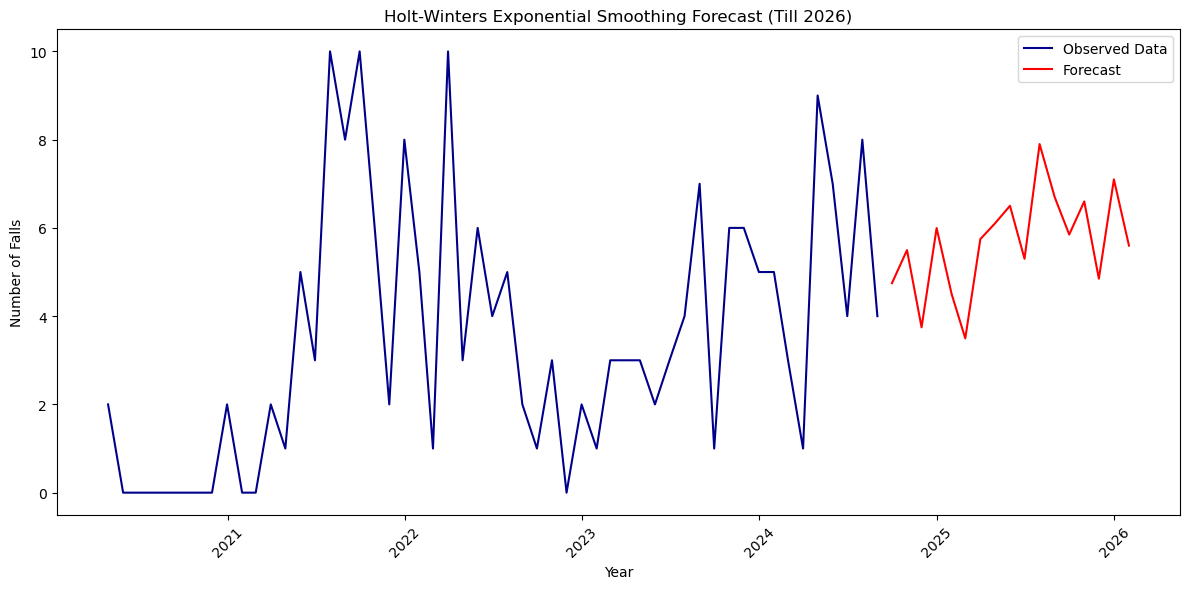

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing


# Fit the Holt-Winters Exponential Smoothing model using the entire dataset
model = ExponentialSmoothing(falls, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Generate forecast for every month until  2026
forecast_periods = (2025 - falls.index[-1].year) * 12 + (12 - falls.index[-1].month) + 1  # Forecast till the 2026
forecast = model_fit.forecast(steps=forecast_periods)

# Create future date index for the forecast
forecast_index = pd.date_range(start=falls.index[-1] + pd.DateOffset(months=1), periods=forecast_periods, freq='M')

# Plot the entire dataset with the forecast
plt.figure(figsize=(12, 6))
plt.plot(falls.index, falls, label='Observed Data', color='darkblue')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('Holt-Winters Exponential Smoothing Forecast (Till 2026)')
plt.xlabel('Year')
plt.ylabel('Number of Falls')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout() 
plt.show()


In [ ]:
# Forecast: The forecast in the graph (Red line) represents a projected trend of the number of falls
# over the next 12 months, based on the Holt-Winters forecasting model.